## Suicide Overview
Using Suicide Rate information we are trying to understand the factors which contribute to higher suicide rates

### Hypothesis
Suicide rates are influenced by socio-economic factors

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Reading dataset

In [119]:
file = r'C:\Users\User\Desktop\master.csv'
df = pd.read_csv(file, sep = '\t')
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [120]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


Due to high volume of Null and duplicate values, HDI & Country-Year columns are dropped

In [121]:
df = df.drop(['HDI for year', 'country-year'], axis = 1)

In [122]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


Plotting all factors to understand corelation with suicides

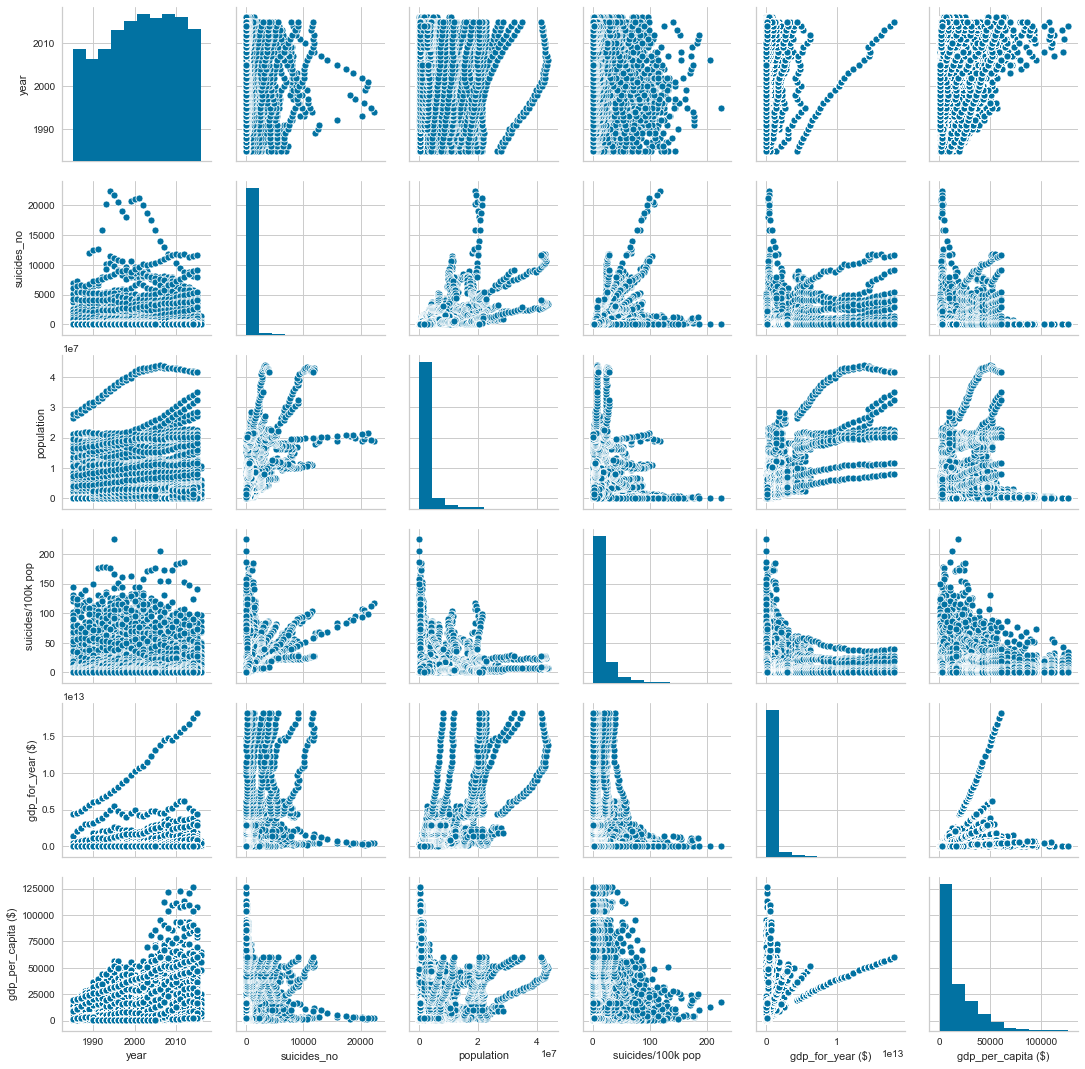

In [124]:
sns.pairplot(df)

Encoding the categorical variables

In [126]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['country', 'sex', 'age', 'generation']
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

In [127]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,0,21,312900,6.71,2156624900,796,2
1,0,1987,1,2,16,308000,5.19,2156624900,796,5
2,0,1987,0,0,14,289700,4.83,2156624900,796,2
3,0,1987,1,5,1,21800,4.59,2156624900,796,1
4,0,1987,1,1,9,274300,3.28,2156624900,796,0


Tracking feature importance

In [128]:
X = df[['country', 'year', 'sex', 'age', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']]

In [129]:
y = df['suicides_no']

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


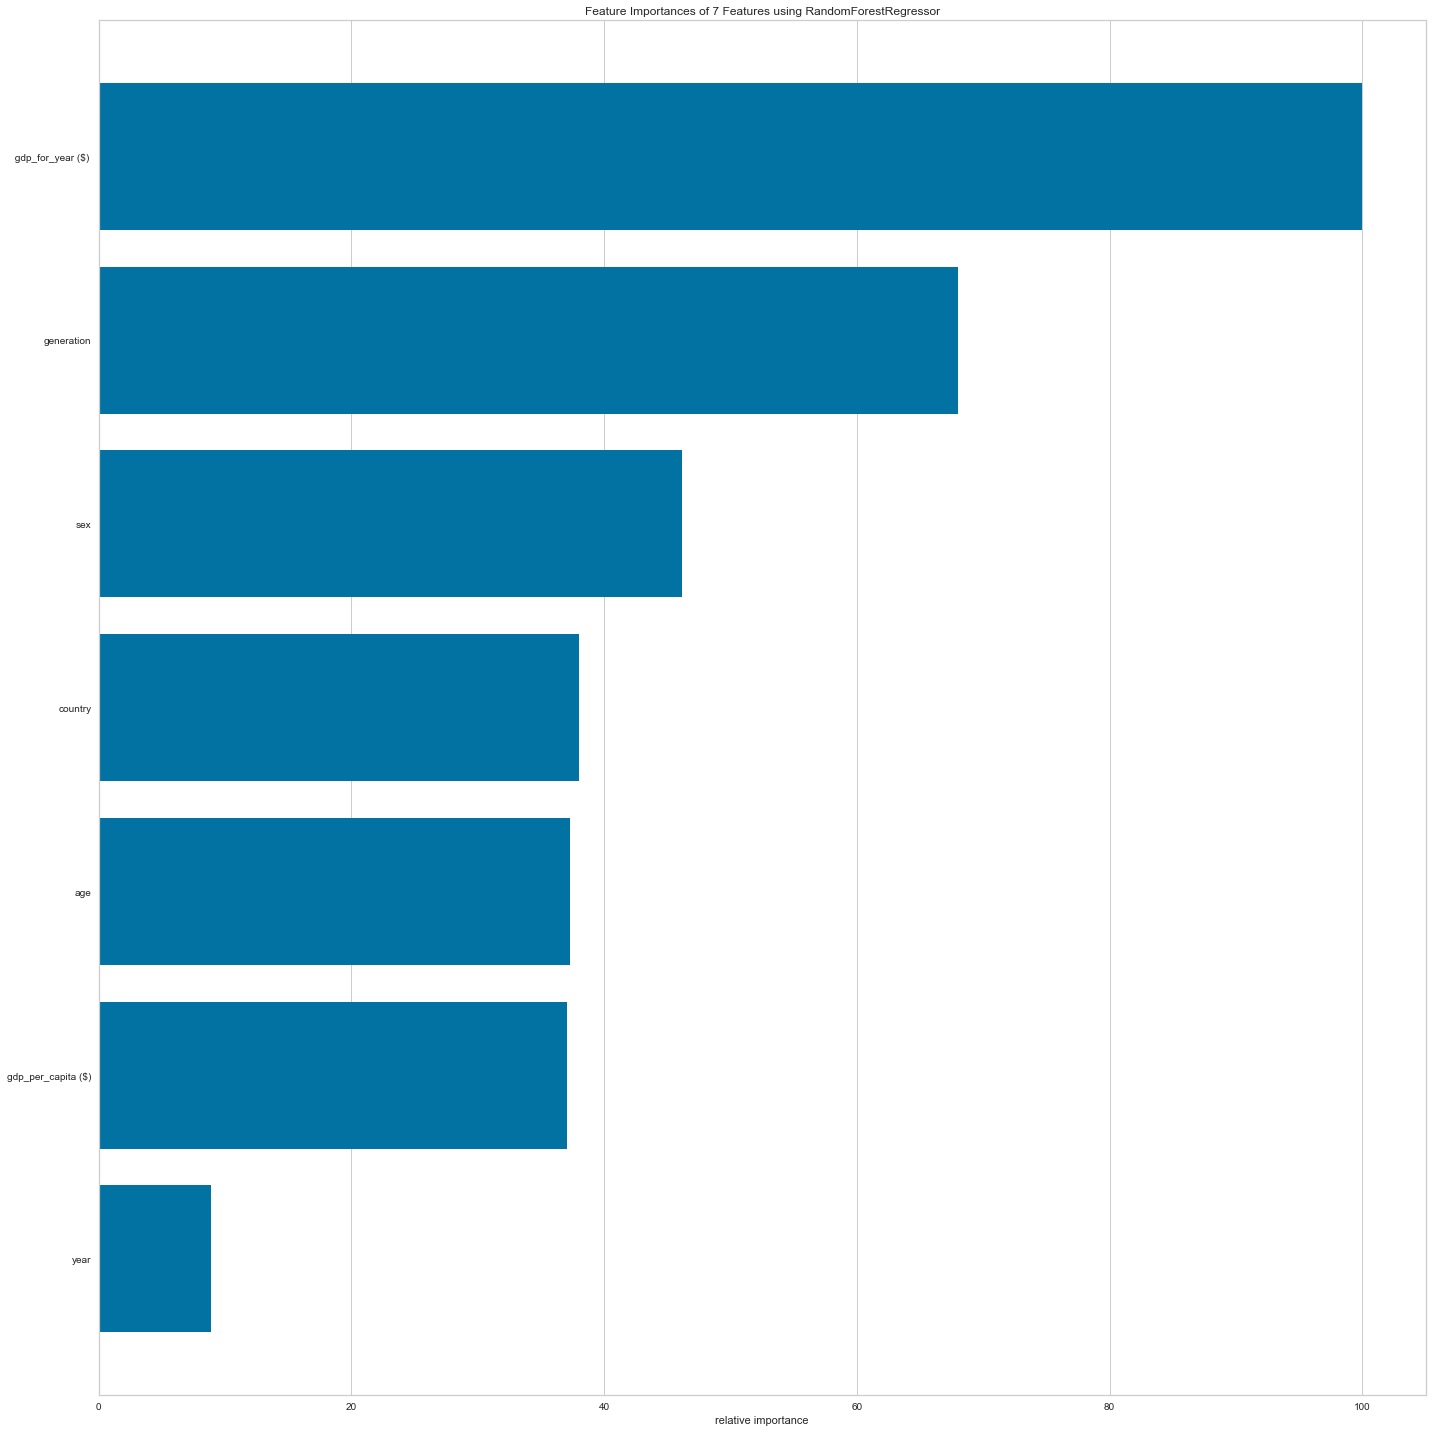

In [130]:
from sklearn.ensemble import RandomForestRegressor

from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()

viz = FeatureImportances(RandomForestRegressor(), ax=ax)
viz.fit(X, y)
viz.poof()

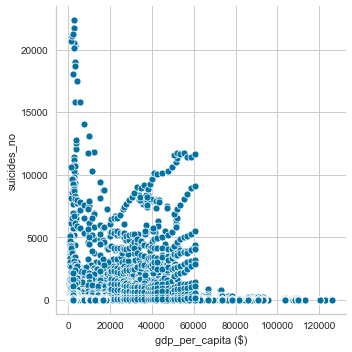

In [131]:
sns.relplot(x= 'gdp_per_capita ($)', y= 'suicides_no', data = df)

As per analysis results, GPD per capita has a strong corelation with suicide rates. As GPD per capita increases suicide rate tend to go down.